# Investigate the Titanic Dataset


# Question on the Titanic Data Set?


What are factors that made a passenger likely to survive? Relationship between passenger sex, passenger class, and fare with their survival will be eexplored in details.<br>
1) What is the estimated popluation percentage of passenger who survived in Titanic crash?<br>
2) What is the estimated popluation percentage of female and male passenger who survived in Titanic crash?<br>
3) What was the breakdown of passenger by passanger class and their Percentage in the sample dataset?<br>
4) Is there realtionship between passenger class and survival in sample ?<br>
5) What is the average fare by a paid by a passenger in the dataset?<br>
6) Is there a realtionship between fare and survival in the dataset?



# Basic Data exploration


I am going to using Ipython notebook for report writing and will be using numpy,pandas and matplotlib libraries for the data anlaysis and visualization.


In [1]:
#importing the pandas and numpy library and data vizualisation library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# used to show plot in the notebook instead of new window.
#%matplotlib inline
#reading the csv file in pandas data frame
data=pd.read_csv('./data/titanic_data.csv')

In [2]:
#Finding the shape of data frame. 
print("The number row,column in the dataframe are: "),data.shape
#Finding details about the data in the  columns
data.info()

The number row,column in the dataframe are:  (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Cleaning up the data.


(a) The Survived column is made up of 0 and 1 which is equivalent to whether the passanger died or survived.While communicating my findings this information in 0 and 1 is unclear and confusing to the reader of the report.Hence i will be converting the column to string "Survived" and "Died" which says what has happened to the passenger. (b) The Sex column had one entry "Male" which and other entries as "male" and "female".For uniformity i have converted "Male" to "male' using mapdf function which applies to the whole column of the dataframe.

In [3]:
# take a data frame and return a updated and cleaned dataframe
def mapdf(df):
    #passanger survival map
    survival_map={0:'Died',1:'Survived'}
    df['Survived']=df['Survived'].map(survival_map)
    #mapping male,female passanger
    gender_map={'Male':'male','male':'male','female':'female'}
    df['Sex']=df['Sex'].map(gender_map)
    return df
titanic_df=mapdf(data)


As i am intrested in factors that made the passangers in the Titanic data set,rather than individual record.Hence I will be droping individual "Name" column and "Ticket" column from the dataframe as they are not useful in my analysis. There is significant number of cabin information which is missing(687 missing out 891) Hence i will not be anlysing any infomation about survival in relation with cabin number.We will remove the cabin column from the dataframe. 



In [4]:
#droping cabin,ticket and name column from data frame.
titanic_df=data.drop(['Name','Ticket','Cabin'],axis=1)

In [5]:
#making sure that the three column name,ticket and cabin are dropped
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null object
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


# 1) What is the estimated popluation percentage of passenger who survived in Titanic crash?



In [6]:
#Exploring a pandas series
survival_series=titanic_df.Survived
print "The total number of passenger :", len(survival_series)
# Break down of passenger who survived,died
print survival_series.value_counts()
print "\n"
#Breakdown by percentage
print "Proportion of Survival"

(survival_series.value_counts()/ len(survival_series))*100

The total number of passenger : 891
Died        549
Survived    342
Name: Survived, dtype: int64


Proportion of Survival


Died        61.616162
Survived    38.383838
Name: Survived, dtype: float64

# Data visulisation of the number of Survivor from the sample.


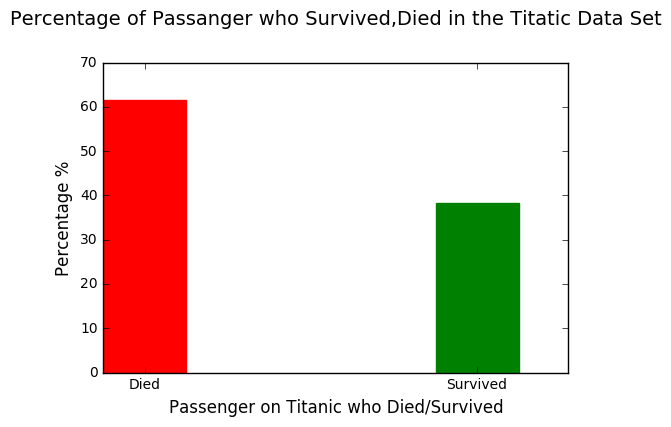

In [7]:
# Bar char  for % of passenger who survived/died
#width of the bar chart

width=0.25
plt.xlabel("Passenger on Titanic who Died/Survived",size=12)
plt.ylabel("Percentage %",size=12)
plt.title("Percentage of Passanger who Survived,Died in the Titatic Data Set",size=14,y=1.1)
barplot=plt.bar(np.arange(2),(61.62,38.38),width)
# setting the color of individual bar to different color
barplot[0].set_color('r')
barplot[1].set_color('g')
plt.xticks(np.arange(2)+width/2.0,('Died','Survived'))
plt.show()

The bar chart above gives a sense to the reader that about 61.62 % died and only 38.38 % survived.These percentage are from a sample in the form of Titanic dataset.We cannot conclude that the proportion will be the same for the population.Hence we will perform a test of proportion to estimate the polulation proportion of passengers survived.


# Statistical test estimating the proportion of population from the sample.


Reference:http://sites.stat.psu.edu/~ajw13/stat200/Fall06/08_means/02_means.htm<br>
population:All the passenger in travelling on titanic ship.<br>
parameter:the true proportion of titanic survivors.<br>
sample:the titanic dataset.<br>
Statistic:the proportion of titianic survivors from sample is used to estitate the true proportion.<br>
Estimating a proportion p where p represents the true (typically unknown) parameter and p-hat [pronounced "p-hat"] represents the statistic calculated from the sample.<br>

Sampling Distributions for Proportions<br>
If numerous repetitions of samples are taken, the distribution of $\hat{p}$  is said to approximate a normal curve distribution. Alternatively, this can be assumed if BOTH n \* $\hat{p}$  and n \*(1 - $\hat{p}$) are at least 10. Using this, we can estimate the true population proportion p by  $\hat{p}$  and the true standard deviation of p by s.e.($\hat{p}$)=$ \sqrt \frac{\hat{p}(1-\hat{p})}{n} $ where s.e.$(\hat{p}$) is interpreted as the standard error of $\hat{p}$

# Calculation


n=891<br>
p=?<br>
$\hat{p}$=0.38<br>
$n(\hat{p})$=891 * 0.38= 338.58 which is > than 10<br>
$n(1-\hat{p})$=891 * 0.62=549.74 which is > than 10<br>
S.E$\hat{p}$=0.016<br>
Confidence interval=Sample Statistic ± Multiplier*Standard Error<br>
We will calculate the proportion of survied passenger with 95% confidence interval.the z score value 1.96<br>
$\hat{p}\pm z\sqrt\frac{\hat{p}(1-\hat{p})}{n}$<br>
0.38 $\pm$1.96(0.01626)

<h3>Estimate of Proportion of survived passenger in the population with 95% confidence interval is bewtween 35% to 41% (0.35,0.41)</h3>


# 2) What is the estimated popluation percentage of female and male passenger who survived in Titanic crash?¶


We will have to find out the number of male,female onboard and how many survived and the their percentage in the sample dataset.



In [8]:
# using crosstab to group data, margin =true give the total(agrregrate) of row,column in field named "All"

gender_df=pd.crosstab(titanic_df['Sex'],titanic_df['Survived'],margins=True)

#Adding a % Died % Survived column to gender_df and calculating the % value
gender_df['% Died']=(gender_df.Died/gender_df.All)*100
gender_df['% Survived']=(gender_df.Survived/gender_df.All)*100
#print gender_df
print gender_df

Survived  Died  Survived  All     % Died  % Survived
Sex                                                 
female      81       233  314  25.796178   74.203822
male       468       109  577  81.109185   18.890815
All        549       342  891  61.616162   38.383838


# Data visulisation of number of alive and dead passanger by gender from the data set.


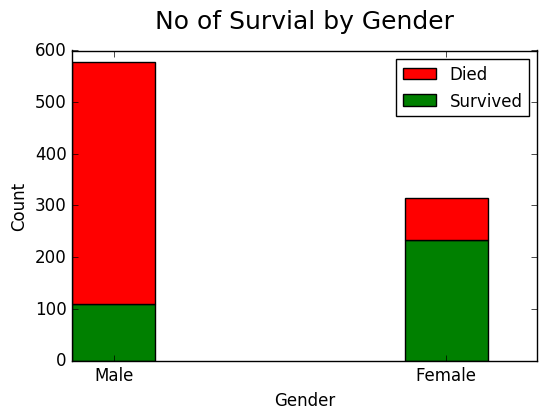

In [9]:
#bar char using matplotlib for number of passenger who are dead or alive by gender
N=2#no of values of data
ind=np.arange(N)
width=0.25 #width of the bar chart
bar1=(109,233) #(survived male ,female)
bar2=(468,81) #( died male,female)

p1=plt.bar(ind,bar1,width,color='g')
p2=plt.bar(ind,bar2,width,bottom=bar1,color='r')
#title,xtick,yticks,xlabel,ylabel,legend,bar graph 
plt.title("No of Survial by Gender",size=18,y=1.05)#tittle size is the font size and y is distance 
#set_xlabel(xlabel, fontdict=None, labelpad=None, **kwargs)
#1st parameter xlabel :gender,font dict if you want the font of particular type,label pad distance from the axis,kwards diff args
plt.xlabel("Gender",size=12)
plt.ylabel("Count",rotation=90,size=12)#pltmargin can specify the xmargins,ymargins
#plt.margins(xmargin=1,ymargin=0)
plt.xticks(ind+width/2.0,('Male','Female'),size=12)
plt.yticks((0,100,200,300,400,500,600),size=12)
plt.legend((p2[0], p1[0]), ( 'Died','Survived'))
plt.show()

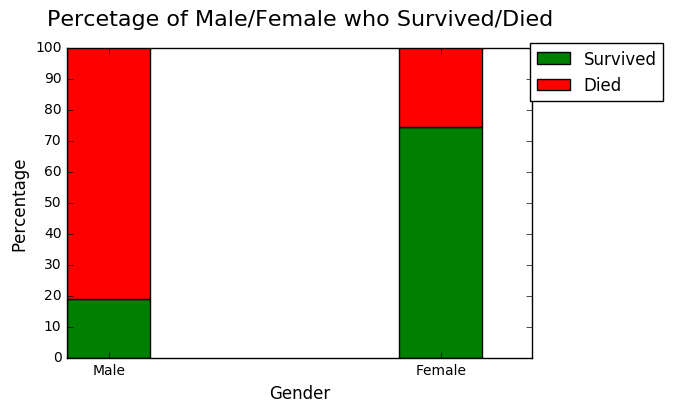

In [10]:
#Bar Chart for % of people who survived/died by gender
N=2
ind=np.arange(2)
bar1=(18.90,74.21)#(%survival of male,female )
bar2=(81.10,25.79)#(%death of male,female )
width=0.25 # width of the bar plot
p3=plt.bar(ind,bar1,width,color='green')
p4=plt.bar(ind,bar2,width,bottom=bar1,color='red')
plt.title("Percetage of Male/Female who Survived/Died",y=1.05,size=16)
plt.xlabel("Gender",size=12)
plt.ylabel("Percentage",rotation=90,size=12)
plt.xticks(ind+width/2.,('Male','Female'))
plt.yticks((0,10,20,30,40,50,60,70,80,90,100))
plt.legend((p3[0], p4[0]),( 'Survived','Died'),bbox_to_anchor=(1.3,1.04))
plt.show()

The bar chart above gives a sense to the reader that about 74.20 % female survived and 25.80 % died.For the gender male, 18.89 % survived and 81.11 % died. percentage are from a sample in the form of Titanic dataset.We cannot conclude that the proportion will be the same for the population.Hence we will estimate the proportion of male and female survivors from the sample dataset.


# Statistical test estimating the proportion of population from the sample.


<h3>Female survivor calculation</h3>
n=314<br>
p=?<br>
$\hat{p}$=0.74<br>
$n(\hat{p})$=314 * 0.74= 232.98 which is > than 10<br>
$n(1-\hat{p})$=314 * 0.258=81.01 which is > than 10<br>
S.E$\hat{p}$=0.02469<br>
Confidence interval=Sample Statistic ± Multiplier*Standard Error<br>
We will calculate the proportion of survied passenger with 95% confidence interval.the z score value 1.96<br>
$\hat{p}\pm z\sqrt\frac{\hat{p}(1-\hat{p})}{n}$<br>
0.7420 $\pm$1.96(0.02469)


<h3>Estimate of Proportion of female survivor passenger in the population with 95% confidence interval is bewtween 69.3% to 79.03% (0.693,0.7903)</h3>

<h3>Male survivor calculation</h3>
n=577<br>
p=?<br>
$\hat{p}$=0.1819<br>
$n(\hat{p})$=577 * 0.1819= 104.95 which is > than 10<br>
$n(1-\hat{p})$=577 * 0.8181=472.043 which is > than 10<br>
S.E$\hat{p}$=0.01077<br>
Confidence interval=Sample Statistic ± Multiplier*Standard Error<br>
We will calculate the proportion of survied passenger with 95% confidence interval.the z score value 1.96<br>
$\hat{p}\pm z\sqrt\frac{\hat{p}(1-\hat{p})}{n}$<br>
0.1819 $\pm$1.96(0.021120)


<h3>Estimate of Proportion of male survivor passenger in the population with 95% confidence interval is bewtween 16.07% to 20.30% (0.1607,0.2030)</h3>


# What was the breakdown of passenger by passanger class and their Percentage in sample data set?



In [11]:
#Exploring a pandas series
pclass_series=titanic_df.Pclass
print "The total number of passenger in Pclass :", len(pclass_series)
# Break down of passenger who by class
print pclass_series.value_counts()
print "\n"
#Breakdown by percentage
print "Percentage % By Pclass"

(pclass_series.value_counts()/ len(pclass_series))*100

The total number of passenger in Pclass : 891
3    491
1    216
2    184
Name: Pclass, dtype: int64


Percentage % By Pclass


3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

# Data visualisation of percentage of passenger by class.




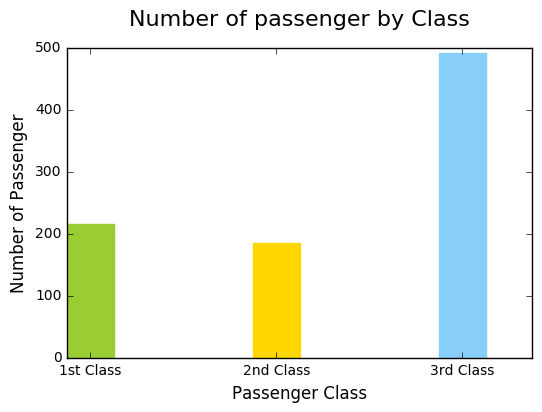

In [12]:
#bar chart for showing the number of passenger by class
width=0.25
plt.xlabel("Passenger Class",size=12)
plt.ylabel("Number of Passenger",size=12)
plt.title("Number of passenger by Class",size=16,y=1.05)
barplot=plt.bar(np.arange(3),(216,184,491),width)
# setting the color of individual bar to different color
barplot[0].set_color('yellowgreen')
barplot[1].set_color('gold')
barplot[2].set_color('lightskyblue')
plt.xticks(np.arange(3)+width/2.0,('1st Class','2nd Class','3rd Class'))
plt.show()

The bar chart above gives a sense to the reader that the number of passenger by class. There were 216: "1st class passenger", 184: "2nd class passenger" and 491: "3 rd class passengers" in the sample data set.



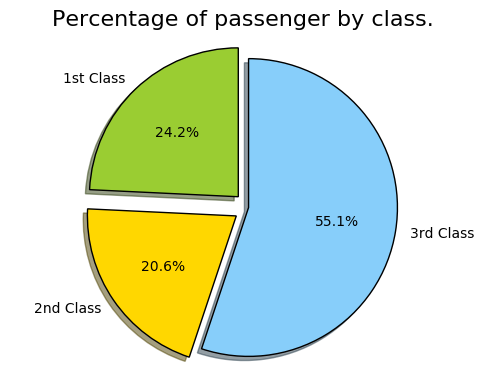

In [13]:
#Pie chart to display percentage of passenger by class
# The slices will be ordered and plotted counter-clockwise.
labels = '1st Class', '2nd Class', '3rd Class'
sizes = [24.24, 20.64,55.11]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0.1, 0.1,0)
plt.pie(sizes,explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title("Percentage of passenger by class.",size=16,y=1.05)
plt.show()

The pie chart above gives a sense to the reader that the Percentage of passenger by class. There were 24.2%: "1st class passenger", 20.6% : "2nd class passenger" and 55.1%: "3 rd class passengers".These percentage are from a sample in the form of Titanic dataset.We cannot conclude that the proportion will be the same for the population.We can estimate the population proportion as we did the previous 2 question if wish to.


# 4) Is there realtionship between passenger class and survival in the sample?¶



In [14]:
# grouping data by Pclass,Survival.
df_pclass=pd.crosstab(titanic_df['Pclass'],titanic_df['Survived'],margins=True)
df_pclass

Survived,Died,Survived,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [15]:
#Calculatitng the percentage of survived,died with in each class. and adding a %Survived and % Died
df_pclass['%Survived']=(df_pclass.Survived/df_pclass.All)*100
df_pclass['%Died']=(df_pclass.Died/df_pclass.All)*100
df_pclass


Survived,Died,Survived,All,%Survived,%Died
Pclass,,,,,
1,80,136,216,62.962963,37.037037
2,97,87,184,47.282609,52.717391
3,372,119,491,24.236253,75.763747
All,549,342,891,38.383838,61.616162


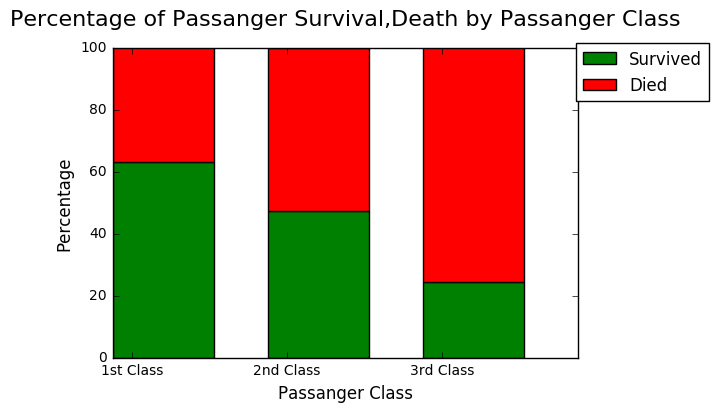

In [16]:
#Data visualisation 
bar1=plt.bar(np.arange(3),(62.96,47.28,24.24),width=0.65,color='g')
bar2=plt.bar(np.arange(3),(37.04,52.72,75.76),width=0.65,bottom=(62.96,47.28,24.24),color='r')
plt.xlabel("Passanger Class",size=12)
plt.xticks((np.arange(3)+width/2.0),('1st Class','2nd Class','3rd Class'))
plt.ylabel("Percentage",size=12,rotation=90)
plt.legend((bar1[0], bar2[0]),( 'Survived','Died'),bbox_to_anchor=(1.3,1.04))
plt.title("Percentage of Passanger Survival,Death by Passanger Class",size=16,y=1.05)
plt.show()

From the sample dataset we can say that 62.96% 1st Class,47.23% 2nd Class and 24.23% 3rd Class passenger were likely to survive.There is a possiblility that 1st class passengers had a higher chance of survival that 2nd and 3rd class passengers from sample dataset.We can estimate the population proportions if we wish to as done in previous example.

# 5) What is the average fare by a paid by a passenger in the sample data?


In [17]:
#Exploring the Fare column 1D
titanic_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

For the information about it clear that average passenger fare is  32.20.Maximum passenger farepaid is 512.32.

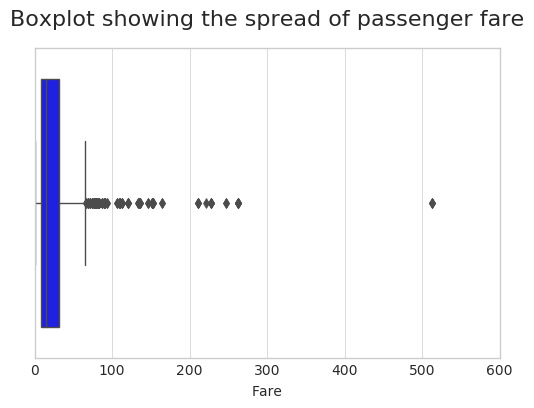

In [18]:
#Spread of fare show using a box plot.
sns.set_style("whitegrid")
boxplot=sns.boxplot(titanic_df.Fare)
boxplot.set_title("Boxplot showing the spread of passenger fare",size=16,y=1.05)
plt.show()

The box plot plot above give the reader a sense of the spread of passenger fare data.IQR(q3-q1) =31-7.91=23.09 Q1–1.5 × IQR =(7.91-1.5)x23.09=148.00 Q3+1.5 × IQR =(31+1.5)x23.09=750.42 Any passenger fare not in the range of 148 to 750.42 is an outlier.Just 29 fare record are found to be in this range out of 891. Therefore we wont be able to predict with accurancy.



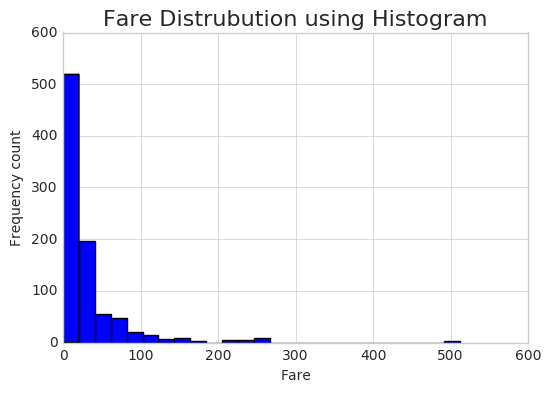

In [19]:
# plot showing histogram of the fare distribution with 25 bins
# fare is plotted on the x axis y axis is the frequency of the amount of fare.
plt.hist(titanic_df.Fare.dropna(),25)
plt.xlabel("Fare")
plt.ylabel("Frequency count")
plt.title("Fare Distrubution using Histogram",size=16)
plt.show()

From the histogram we know the frequency distribution (shape) of the fare data.We can see the fare data produces a histogram which is skewed right.


# 6) Is there a realtionship between fare and survival in sample dataset?


In [20]:
#Exploring fare column with survival

#bin interval variable starting with -50 because we want the no of  fare having  $0,followed by max and the inverval or 50 units.
filter_values=np.arange(-50,600,200)
#pd .cut used to bin the fare data and cross tab used to no passenger survival,death by fare range
df_fare=pd.crosstab(pd.cut(titanic_df['Fare'],filter_values),titanic_df['Survived'],margins=True)
# calculating the death % and adding a new column to data frame
df_fare['Death %']=(df_fare.Died/df_fare.All)*100
# calculating the survival % and adding a new column to data frame
df_fare['Survival %']=(df_fare.Survived/df_fare.All)*100
#printing the dataframe
df_fare

Survived,Died,Survived,All,Death %,Survival %
Fare,,,,,
"(-50, 150]",540,322,862,62.645012,37.354988
"(150, 350]",9,17,26,34.615385,65.384615
"(350, 550]",0,3,3,0.000000,100.000000
All,549,342,891,61.616162,38.383838


Assumtion that fare range from(350-550) 1st class passenger,fare range(150-350) 2nd class pasenger and fare range(-50-150) 3 rd class passenger.These figure vary if you compare the above table with survival/death by pclass.Also intresting to know that 15 passenger have $0 fare which are likely to be crew onboard.



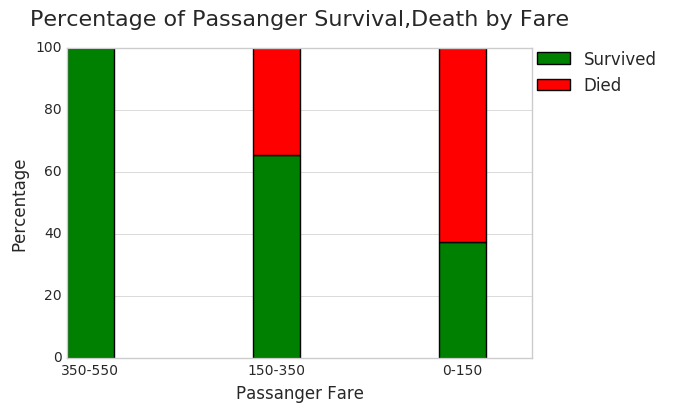

In [21]:
#Data visualisation 
bar1=plt.bar(np.arange(3),(100,65.38,37.35),width=0.25,color='g')
bar2=plt.bar(np.arange(3),(0,34.62,62.65),width=0.25,bottom=(100,65.38,37.35),color='r')
plt.xlabel("Passanger Fare",size=12)
plt.xticks((np.arange(3)+width/2.0),('350-550','150-350','0-150'))
plt.ylabel("Percentage",size=12,rotation=90)
plt.legend((bar1[0], bar2[0]),( 'Survived','Died'),bbox_to_anchor=(1.3,1.04))
plt.title("Percentage of Passanger Survival,Death by Fare",size=16,y=1.05)
plt.show()

From the bar chart we can see that 1st class passenger based on fare had 100% chance of survival,2nd class passenger who survived is 65.38% and 3rd class passenger who survived is 37.35%.There % are higher if we compare the % with the actual pclass because we have assumed the bin size and classfied them in classes.Also the fare data provived is not normal distrubution,hence we can predict with confidence.

# Conclusion
Limitations of dataset The are a number of limitations with the Titanic Dataset, which are caused by:
missing data
only been a sample of the data
most field except age and fare are categorycal data which make prediction inconsistent.

# Reference
1)http://sites.stat.psu.edu/~ajw13/stat200/Fall06/08_means/02_means.htm :For Estimating the population proportion.<br>
2) http://matplotlib.org/ and https://stanford.edu/~mwaskom/software/seaborn/tutorial.html : For graph and charts<br>
3) http://pandas.pydata.org/pandas-docs : Documentation and example.How to use the library?<br>